# Product Length Prediction - EDA

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_colwidth', 100)
sns.set_style('whitegrid')

In [2]:
DATA_PATH = 'data/dataset/dataset/'
SAMPLE_SIZE = 100_000

df = pd.read_csv(f'{DATA_PATH}train.csv', nrows=SAMPLE_SIZE)
print(f'Shape: {df.shape}')
df.head(3)

Shape: (100000, 6)


,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH
0,1925202,"ArtzFolio Tulip Flowers Blackout Curtain for Door, Window & Room | Eyelets & Tie Back | Canvas F...",[LUXURIOUS & APPEALING: Beautiful custom-made curtains to decorate any home or office | Includes...,NaN,1650,2125.980000
1,2673191,Marks & Spencer Girls' Pyjama Sets T86_2561C_Navy Mix_9-10Y,"[Harry Potter Hedwig Pyjamas (6-16 Yrs),100% cotton (exclusive of trimmings),Ribbing - 98% cotto...",NaN,2755,393.700000
2,2765088,PRIKNIK Horn Red Electric Air Horn Compressor Interior Dual Tone Trumpet Loud Compatible with SX4,"[Loud Dual Tone Trumpet Horn, Compatible With SX4,Electric Air Horn with Compressor, Compatible ...","Specifications: Color: Red, Material: Aluminium, Voltage: 12V, dB: 130 dB (around), Material: Al...",7537,748.031495


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   PRODUCT_ID       100000 non-null  int64  
 1   TITLE            99999 non-null   object 
 2   BULLET_POINTS    62812 non-null   object 
 3   DESCRIPTION      48430 non-null   object 
 4   PRODUCT_TYPE_ID  100000 non-null  int64  
 5   PRODUCT_LENGTH   100000 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 4.6+ MB


In [4]:
df.describe()

,PRODUCT_ID,PRODUCT_TYPE_ID,PRODUCT_LENGTH
count,1.000000e+05,100000.000000,1.000000e+05
mean,1.496819e+06,4000.093690,2.327075e+03
std,8.653432e+05,3957.629748,8.591597e+04
min,1.500000e+01,0.000000,1.000000e+00
25%,7.484148e+05,243.750000,5.118110e+02
50%,1.494914e+06,2916.000000,6.653530e+02
75%,2.247434e+06,6396.250000,1.075000e+03
max,2.999994e+06,13416.000000,9.466000e+06


In [5]:
# Missing values
df.isnull().sum() / len(df) * 100

PRODUCT_ID          0.000
TITLE               0.001
BULLET_POINTS      37.188
DESCRIPTION        51.570
PRODUCT_TYPE_ID     0.000
PRODUCT_LENGTH      0.000
dtype: float64

## Target Distribution

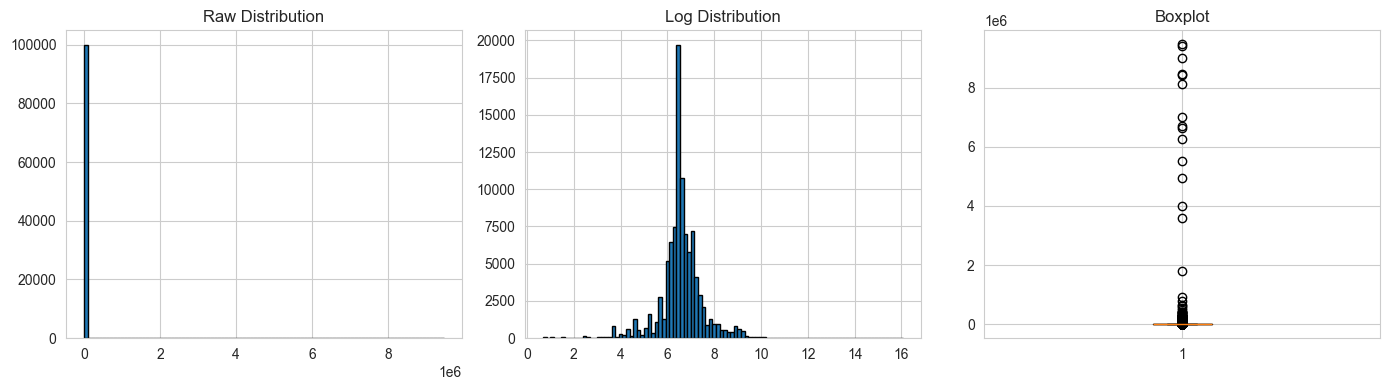

count    1.000000e+05
mean     2.327075e+03
std      8.591597e+04
min      1.000000e+00
1%       3.937000e+01
5%       1.380000e+02
25%      5.118110e+02
50%      6.653530e+02
75%      1.075000e+03
95%      3.543307e+03
99%      9.600000e+03
max      9.466000e+06
Name: PRODUCT_LENGTH, dtype: float64


In [6]:
target = 'PRODUCT_LENGTH'

fig, axes = plt.subplots(1, 3, figsize=(14, 4))

axes[0].hist(df[target], bins=100, edgecolor='black')
axes[0].set_title('Raw Distribution')

axes[1].hist(np.log1p(df[target]), bins=100, edgecolor='black')
axes[1].set_title('Log Distribution')

axes[2].boxplot(df[target])
axes[2].set_title('Boxplot')

plt.tight_layout()
plt.show()

print(df[target].describe(percentiles=[.01, .05, .25, .5, .75, .95, .99]))

## Product Type Analysis

In [7]:
print(f"Unique product types: {df['PRODUCT_TYPE_ID'].nunique()}")

type_stats = df.groupby('PRODUCT_TYPE_ID')[target].agg(['mean', 'median', 'std', 'count'])
type_stats = type_stats.sort_values('count', ascending=False)
type_stats.head(20)

Unique product types: 6295


,mean,median,std,count
PRODUCT_TYPE_ID,,,,
1,658.683670,600.000000,243.814770,5252
12064,603.194002,669.291338,239.893915,2580
0,841.975869,600.000000,1760.726055,2171
123,665.711898,614.000000,151.583614,1394
6104,651.337518,614.000000,85.145428,1312
2879,1281.912893,1000.000000,6819.336880,955
2986,1095.727535,850.000000,1441.188559,875
2916,1303.983011,1181.100000,1091.092377,834
99,582.118703,583.000000,143.993186,807


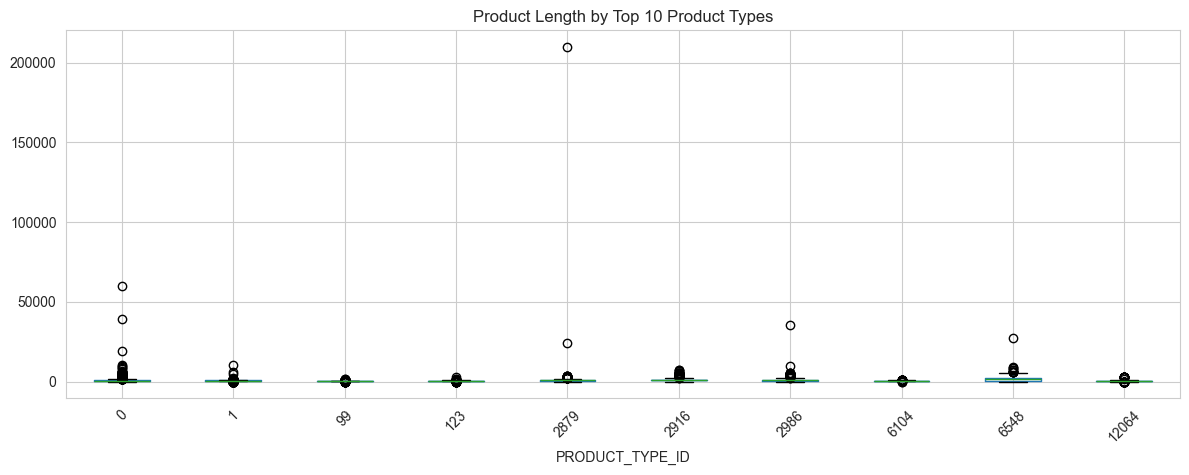

In [8]:
# Target variance by product type
top_types = type_stats.head(10).index

fig, ax = plt.subplots(figsize=(12, 5))
df[df['PRODUCT_TYPE_ID'].isin(top_types)].boxplot(column=target, by='PRODUCT_TYPE_ID', ax=ax)
plt.title('Product Length by Top 10 Product Types')
plt.suptitle('')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Text Features Analysis

In [9]:
df['title_len'] = df['TITLE'].fillna('').str.len()
df['bullet_len'] = df['BULLET_POINTS'].fillna('').str.len()
df['desc_len'] = df['DESCRIPTION'].fillna('').str.len()
df['title_words'] = df['TITLE'].fillna('').str.split().str.len()

text_features = ['title_len', 'bullet_len', 'desc_len', 'title_words']
df[text_features].describe()

,title_len,bullet_len,desc_len,title_words
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,86.875890,315.576390,305.189760,13.591900
std,49.107199,414.620645,475.731781,7.918765
min,0.000000,0.000000,0.000000,0.000000
25%,50.000000,0.000000,0.000000,8.000000
50%,78.000000,148.000000,0.000000,12.000000
75%,117.000000,494.000000,472.000000,18.000000
max,500.000000,4544.000000,2912.000000,89.000000


In [10]:
# Correlation with target
corr_cols = text_features + [target]
print(df[corr_cols].corr()[target].sort_values(ascending=False))

PRODUCT_LENGTH    1.000000
desc_len          0.004767
bullet_len        0.001107
title_len         0.000038
title_words      -0.000279
Name: PRODUCT_LENGTH, dtype: float64


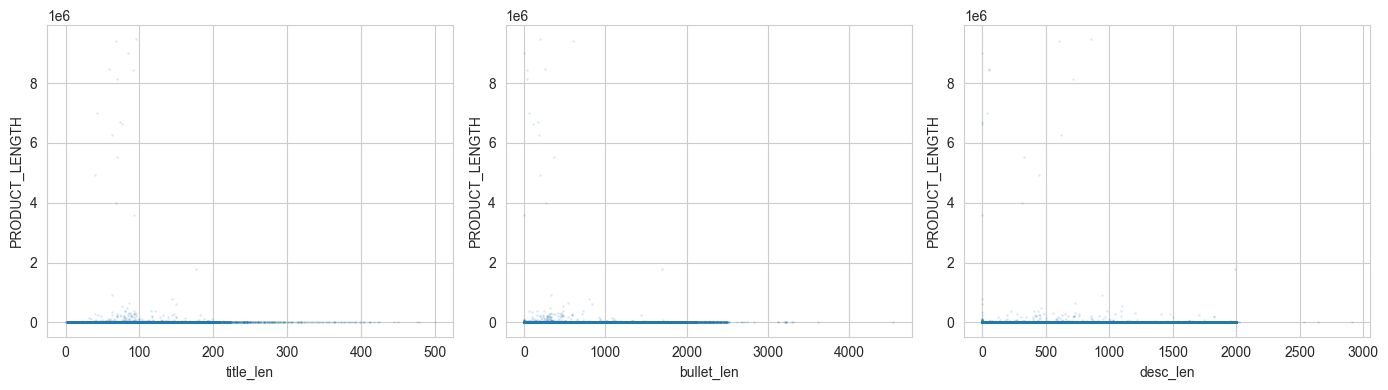

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

for ax, col in zip(axes, ['title_len', 'bullet_len', 'desc_len']):
    ax.scatter(df[col], df[target], alpha=0.1, s=1)
    ax.set_xlabel(col)
    ax.set_ylabel(target)

plt.tight_layout()
plt.show()

## Key Insights Summary

In [12]:
print("=" * 50)
print("KEY INSIGHTS")
print("=" * 50)
print(f"\n1. Target stats:")
print(f"   - Range: {df[target].min():.2f} to {df[target].max():.2f}")
print(f"   - Median: {df[target].median():.2f}, Mean: {df[target].mean():.2f}")
print(f"   - Skewness: {df[target].skew():.2f}")

print(f"\n2. Missing values:")
print(f"   - DESCRIPTION: {df['DESCRIPTION'].isnull().sum()/len(df)*100:.1f}%")
print(f"   - BULLET_POINTS: {df['BULLET_POINTS'].isnull().sum()/len(df)*100:.1f}%")

print(f"\n3. Product types: {df['PRODUCT_TYPE_ID'].nunique()} unique")

print(f"\n4. Text correlations with target:")
for col in text_features:
    print(f"   - {col}: {df[col].corr(df[target]):.4f}")

KEY INSIGHTS

1. Target stats:
   - Range: 1.00 to 9466000.00
   - Median: 665.35, Mean: 2327.08
   - Skewness: 90.45

2. Missing values:
   - DESCRIPTION: 51.6%
   - BULLET_POINTS: 37.2%

3. Product types: 6295 unique

4. Text correlations with target:
   - title_len: 0.0000
   - bullet_len: 0.0011
   - desc_len: 0.0048
   - title_words: -0.0003


## Critical Analysis: Product Type as Strong Predictor

In [13]:
# How much variance is explained by product type alone?
type_medians = df.groupby('PRODUCT_TYPE_ID')[target].median()

# Baseline: predict median per product type
df['pred_type_median'] = df['PRODUCT_TYPE_ID'].map(type_medians)

# MAPE using product type median
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_type_median = mape(df[target], df['pred_type_median'])
mape_global_median = mape(df[target], df[target].median())

print(f"MAPE (global median): {mape_global_median:.2f}%")
print(f"MAPE (per-type median): {mape_type_median:.2f}%")
print(f"\nReduction: {mape_global_median - mape_type_median:.2f}%")

MAPE (global median): 208.11%
MAPE (per-type median): 400.87%

Reduction: -192.76%


In [14]:
# MAPE is sensitive to small values - check distribution
print("Target value distribution:")
print(f"Values < 10: {(df[target] < 10).sum()} ({(df[target] < 10).mean()*100:.2f}%)")
print(f"Values < 100: {(df[target] < 100).sum()} ({(df[target] < 100).mean()*100:.2f}%)")
print(f"Values > 10000: {(df[target] > 10000).sum()} ({(df[target] > 10000).mean()*100:.2f}%)")

# Log-scale MAPE equivalent (MSLE)
from sklearn.metrics import mean_squared_log_error
msle_global = mean_squared_log_error(df[target], [df[target].median()] * len(df))
msle_type = mean_squared_log_error(df[target], df['pred_type_median'])
print(f"\nRMSLE (global median): {np.sqrt(msle_global):.4f}")
print(f"RMSLE (per-type median): {np.sqrt(msle_type):.4f}")

Target value distribution:
Values < 10: 341 (0.34%)
Values < 100: 3187 (3.19%)
Values > 10000: 873 (0.87%)

RMSLE (global median): 0.9786
RMSLE (per-type median): 0.8335


In [15]:
# Coefficient of variation per product type (high CV = hard to predict)
type_cv = df.groupby('PRODUCT_TYPE_ID')[target].agg(
    lambda x: x.std() / x.mean() if x.mean() > 0 else 0
)
print(f"Mean CV across types: {type_cv.mean():.2f}")
print(f"Types with CV > 1: {(type_cv > 1).sum()} ({(type_cv > 1).mean()*100:.1f}%)")

# R-squared for product type only
from sklearn.metrics import r2_score
r2 = r2_score(df[target], df['pred_type_median'])
print(f"\nR² (product type median only): {r2:.4f}")

Mean CV across types: 0.64
Types with CV > 1: 633 (10.1%)

R² (product type median only): 0.0609


## Text Content Analysis - Extract Dimensions

In [16]:
# Check if dimensions are mentioned in text
import re

def extract_dimensions(text):
    if pd.isna(text):
        return None
    patterns = [
        r'(\d+\.?\d*)\s*(cm|mm|inch|inches|in|feet|ft|m|meter)',
        r'(\d+\.?\d*)\s*x\s*(\d+\.?\d*)',
        r'length[:\s]+(\d+\.?\d*)',
    ]
    for p in patterns:
        match = re.search(p, str(text).lower())
        if match:
            return True
    return False

df['has_dimensions'] = df['TITLE'].apply(extract_dimensions) | \
                       df['BULLET_POINTS'].apply(extract_dimensions) | \
                       df['DESCRIPTION'].apply(extract_dimensions)

print(f"Products with dimension info in text: {df['has_dimensions'].sum()} ({df['has_dimensions'].mean()*100:.1f}%)")

Products with dimension info in text: 32389 (32.4%)


In [17]:
# Sample titles to understand product types
print("Sample high-length products:")
print(df.nlargest(5, target)[['TITLE', target]].to_string())
print("\nSample low-length products:")
print(df.nsmallest(5, target)[['TITLE', target]].to_string())

Sample high-length products:
                                                                                                 TITLE  PRODUCT_LENGTH
77427  Body Glove Women's Smoothies in-Motion Solid Short Sleeve Rashguard with UPF 50 Midnight, Large       9466000.0
66471                             Dotti Ibiza Stripe Side Shirred Hoodie Tunic Cover-Up Black/White XL       9398900.0
74415            Offray Jungle Animal Print Tulle Craft Ribbon, 6-Inch by 25-Yard Spool, Cheetah Print       9000000.0
27561                                      JAG Women's Rugby Stripe Strappy Side Bottom, Very Berry, L       8466600.0
54146      COCO RAVE Junior's High Leg Bikini Bottom Swimsuit, Good Vibratinos Jet Black Marl, X-Small       8428900.0

Sample low-length products:
                                                                                                                  TITLE  PRODUCT_LENGTH
1979  Jaxx Panelist Modern Padded Headboard - Set of 4 Fun Color Panels for Kids - Full/Quee

## Total Sentence Data Check

In [20]:
ts_train = pd.read_csv('data/total_sentence_data/total_sentence_data/total_sentence_train.csv', nrows=100_000)
ts_test = pd.read_csv('data/total_sentence_data/total_sentence_data/total_sentence_test.csv', nrows=100_000)

print("Train shape:", ts_train.shape)
print("Test shape:", ts_test.shape)
print("\nTrain NaN counts:")
print(ts_train.isnull().sum())
print("\nTest NaN counts:")
print(ts_test.isnull().sum())

Train shape: (100000, 4)
Test shape: (100000, 3)

Train NaN counts:
PRODUCT_ID         0
PRODUCT_TYPE_ID    0
PRODUCT_LENGTH     0
TOTAL_SENTENCE     0
dtype: int64

Test NaN counts:
PRODUCT_ID         0
PRODUCT_TYPE_ID    0
TOTAL_SENTENCE     0
dtype: int64


In [21]:
# Quick stats on total_sentence
print("TOTAL_SENTENCE length stats:")
print(ts_train['TOTAL_SENTENCE'].str.len().describe())
print(f"\nUnique product types in sample: {ts_train['PRODUCT_TYPE_ID'].nunique()}")

TOTAL_SENTENCE length stats:
count    100000.000000
mean        688.601590
std         805.225096
min           2.000000
25%          74.000000
50%         346.000000
75%        1063.000000
max        6578.000000
Name: TOTAL_SENTENCE, dtype: float64

Unique product types in sample: 6279
